

The case study we take up in this module pertains to red wines. Dataset that we have contains chemical properties over 4000 red wines . In class we'll take up two important chemical properties which control wine's aroma and potency , namely sulphate and alcohol content.

We want to check how many groups exist within wines based on these chemicals. Lets begin.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler #### (x-mean)/standard_deviation

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
wine_sub = wine[["sulphates","alcohol"]] ### Two features are selected just for demonstration purposes

In [ ]:
wine_sub.head()

,sulphates,alcohol
0,0.56,9.4
1,0.68,9.8
2,0.65,9.8
3,0.58,9.8
4,0.56,9.4


In [ ]:
wine_sub.describe()

,sulphates,alcohol
count,1599.000000,1599.000000
mean,0.658149,10.422983
std,0.169507,1.065668
min,0.330000,8.400000
25%,0.550000,9.500000
50%,0.620000,10.200000
75%,0.730000,11.100000
max,2.000000,14.900000


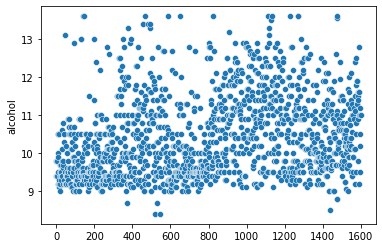

In [ ]:
import seaborn as sns

#sns.scatterplot(y = wine_sub['sulphates'],x = list(wine_sub.index))

sns.scatterplot(y = wine_sub['alcohol'],x = list(wine_sub.index))

In [ ]:
##### Outlier Treatment #######

sulphates_995 = wine_sub['sulphates'].quantile(0.995)
alcohol_995 = wine_sub['alcohol'].quantile(0.995)

wine_sub.loc[wine_sub['sulphates']>sulphates_995,'sulphates'] = sulphates_995

wine_sub.loc[wine_sub['alcohol']>alcohol_995, 'alcohol'] = alcohol_995

In [ ]:
#### There is scale difference - Perform scaling

You can see that scale of sulphates and alcohol are very different. If we let them be like that , distances will be dominated by alcohol percentages alone due to their scale. We need to scale them

In [ ]:
ss = StandardScaler()

ss.fit(wine_sub) #### This will compute the mean and the standard deviation for every column in wine_sub

wine_std = pd.DataFrame(ss.transform(wine_sub)) ### it will apply the transformation (x-mean)/s.d.

In [ ]:
wine_std.columns = ['sulphates', 'alcohol']

In [ ]:
wine_std.describe()

,sulphates,alcohol
count,1.599000e+03,1.599000e+03
mean,5.684924e-16,1.542162e-15
std,1.000313e+00,1.000313e+00
min,-2.075176e+00,-1.911690e+00
25%,-6.749439e-01,-8.708971e-01
50%,-2.294155e-01,-2.085741e-01
75%,4.707006e-01,6.429841e-01
max,4.493186e+00,3.012208e+00


In [ ]:
#wine_std=pd.DataFrame(scale(wine),columns=list(wine.columns)) ### scale is analogus standard scaling

Output of function `scale` is matrix , we need to convert it back to data frame in order to keep on using it as data frame.

In [ ]:
#wine_std.describe()

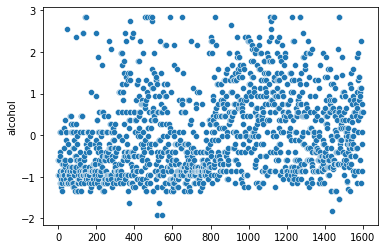

In [ ]:
import seaborn as sns

#sns.scatterplot(y = wine_std['sulphates'],x = list(wine_std.index))

sns.scatterplot(y = wine_std['alcohol'],x = list(wine_std.index))

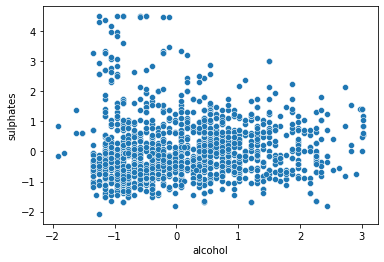

In [ ]:
sns.scatterplot(x = wine_std['alcohol'],y = wine_std['sulphates'])

In [ ]:
#### Fit k means ####

kmeans = KMeans(n_clusters=3) ### Initialize the kmeans class
kmeans.fit(wine_std[['sulphates','alcohol']])

KMeans(n_clusters=3)

In [ ]:
wine_std.shape

(1599, 2)

In [ ]:
######### get the cluster numbers correcsponding to every obersvation on which the kmeans was fit ########

print(wine_std.shape)

print(kmeans.labels_) ### cluster information for every observation on which kmeans was fit!

print(len(kmeans.labels_))

(1599, 3)
[1 1 1 ... 2 1 2]
1599


In [ ]:
wine_std['cluster_num'] = kmeans.labels_

In [ ]:
wine_std.tail()

,sulphates,alcohol,cluster_num
1594,-0.484003,0.075279,1
1595,0.661641,0.737602,0
1596,0.597994,0.548367,0
1597,0.343407,-0.208574,1
1598,0.025172,0.548367,0


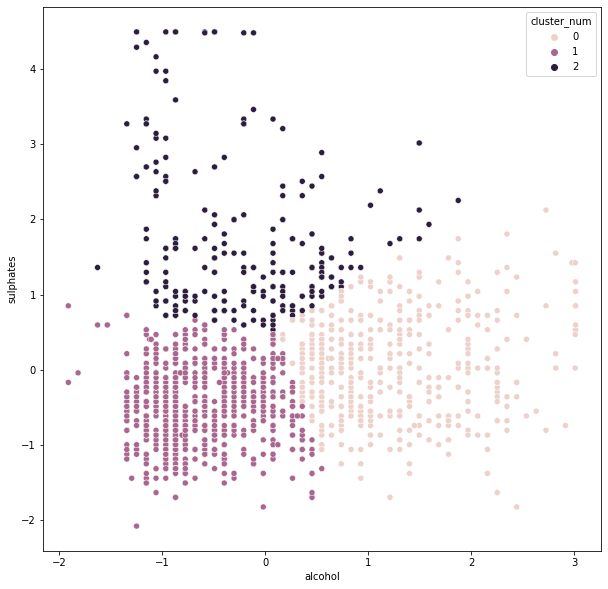

In [ ]:
############## Visualizing the clusters ###############

plt.figure(figsize=(10,10))
sns.scatterplot(x = wine_std['alcohol'], y = wine_std['sulphates'], hue = wine_std['cluster_num'])

In [ ]:
kmeans.cluster_centers_

array([[ 0.03063878,  1.22465068],
       [-0.48655485, -0.62306335],
       [ 1.7290296 , -0.23172942]])

In [ ]:
##### cluster centres #####

pd.DataFrame(kmeans.cluster_centers_, columns = ['sulphates_cordinate', 'alcohol_cordinate'])

,sulphates_cordinate,alcohol_cordinate
0,1.729030,-0.231729
1,-0.486555,-0.623063
2,0.030639,1.224651


In [ ]:
###### Inertia of the fit #####

kmeans.inertia_

1197.3297237899974

In [ ]:
############## Compute the silouhette score ############

print(silhouette_score(wine_std[['sulphates','alcohol']],kmeans.labels_))

0.4582936372498494


In the code below , we are trying different values of cluster numbers and for each we are examning silhoutte scores along with their silhoutte plots and visual representation of clusters.

Most of the code below has to do with how the plots are made pretty.

You dont need to do all that every time you do segmentation using K-means. This is more to do with giving you first hand experience as to what silhoutte plots are and how the eventual clusters look like.

You should also notice , how silhoutte scores both average and individual detriorate as we keep on unneccesarily increasing number of clusters. 

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
silhouette_score(wine, kmeans.labels_)

0.5184003155871573

In [ ]:
########## Finding optimal number of clusters for K means using silouhette score #########

range_clusters = [2,3,4,5,6,7,8,9,10,15, 30]
inertias = []

for cluster in range_clusters:
  kmeans = KMeans(n_clusters=cluster, random_state=10)
  kmeans.fit(wine_std[['sulphates', 'alcohol']])
  score = silhouette_score(wine_std[['sulphates', 'alcohol']], kmeans.labels_)
  inertias.append(kmeans.inertia_)
  print('The silhouette score for {} clusters is {}'.format(cluster, score))

The silhouette score for 2 clusters is 0.4198650546914432
The silhouette score for 3 clusters is 0.4582936372498494
The silhouette score for 4 clusters is 0.4256111420642427
The silhouette score for 5 clusters is 0.39727623094330594
The silhouette score for 6 clusters is 0.39152866978772066
The silhouette score for 7 clusters is 0.37924779009108467
The silhouette score for 8 clusters is 0.35816770267542447
The silhouette score for 9 clusters is 0.3510390764802408
The silhouette score for 10 clusters is 0.35506474582803077
The silhouette score for 15 clusters is 0.3476360509208424
The silhouette score for 30 clusters is 0.3463976624758974


In [ ]:
inertias

[1940.8974972865858,
 1197.3297237899974,
 955.650441967133,
 755.8450242906024,
 619.917693949603,
 535.4744624095842,
 462.08849689247324,
 414.53153264701643,
 370.9922118651443,
 254.98900345731147]

In [ ]:
wine_std[['sulphates', 'alcohol']] = pd.DataFrame(ss.inverse_transform(wine_std[['sulphates', 'alcohol']]))

In [ ]:
wine_std.describe()

,sulphates,alcohol,cluster_num
count,1599.000000,1599.000000,1599.000000
mean,0.656045,10.420439,0.842402
std,0.157166,1.057217,0.655336
min,0.330000,8.400000,0.000000
25%,0.550000,9.500000,0.000000
50%,0.620000,10.200000,1.000000
75%,0.730000,11.100000,1.000000
max,1.362000,13.604000,2.000000


In [ ]:
wine_std.groupby(['cluster_num']).aggregate({'sulphates':['mean', 'std'], 'alcohol': ['mean', 'std']})

sulphates              alcohol          
                 mean       std       mean       std
cluster_num                                         
0            0.660859  0.105910  11.714755  0.720134
1            0.579599  0.077740   9.761932  0.474715
2            0.927705  0.161102  10.175527  0.726432

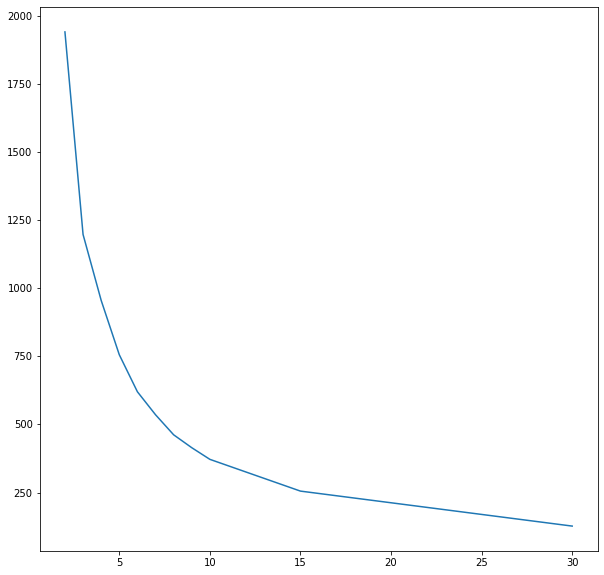

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range_clusters,inertias)

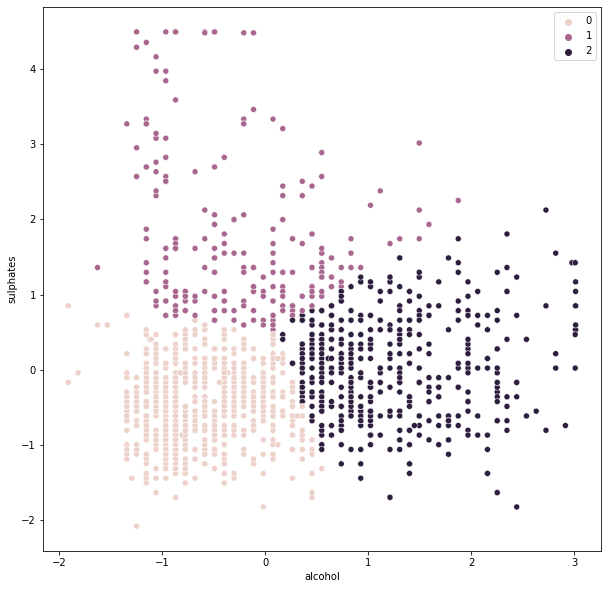

In [ ]:
ideal_fit = KMeans(n_clusters=3, random_state=10)

ideal_fit.fit(wine_std[['sulphates','alcohol']])

plt.figure(figsize=(10,10))
sns.scatterplot(x = wine_std['alcohol'], y = wine_std['sulphates'],hue = ideal_fit.labels_)

We can decide number of cluster using SSW as well as mentioned in the theoretical discussion. SSW is named `inertia_` as kmeans function's attribute.

In [ ]:
ideal_fit.predict(wine_std.loc[[0,1],['sulphates','alcohol']])

array([0, 0], dtype=int32)

You can see here the clear elbow point at k=3.

We can try hierarchical clustering as well, it gives most efficient clusters but at much more computational cost. Lets see if results from it are very different from K-means.

In [ ]:
X = wine[['alcohol','sulphates']]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)


For n_clusters = 2 The average silhouette_score is: 0.5681625944850264
For n_clusters = 3 The average silhouette_score is: 0.5587722383484444
For n_clusters = 4 The average silhouette_score is: 0.5077818411848196
For n_clusters = 5 The average silhouette_score is: 0.44365718021738515
For n_clusters = 6 The average silhouette_score is: 0.4409210542719657
For n_clusters = 7 The average silhouette_score is: 0.41084793001856473
For n_clusters = 8 The average silhouette_score is: 0.4177921309773996
For n_clusters = 9 The average silhouette_score is: 0.41568758475995393


We have agreement on number of clusters. Lets see how the end results differ

In [ ]:
s = 3
hclust = AgglomerativeClustering(n_clusters=s, affinity='euclidean',linkage='ward')
hclust.fit(wine_std)

In [ ]:
labels = hclust.fit_predict(X)
wine_std["cluster"]=labels

In [ ]:
for i in range(s):
    # select only data observations with cluster label == i
    hc = wine_std[wine_std["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(hc[:,0],hc[:,1],'o')

plt.show()

We can see that kmeans did an excellent job and we did not really need to get into hierarchical clustering to get the best results.

Next we look density based clustering algorithm dbscan. We will take a toy data to bring out clear difference between k-means and dbscan. This example demonstrate how k-means can no capture non-spherical groups in the data. We will be using make_moons function to make data which has two moon shaped very apparent groups. Lets see.

In [ ]:
from sklearn.datasets import make_moons

mydata = make_moons(n_samples = 2000,noise=0.05)

print(mydata[0].shape)

mydata=pd.DataFrame(mydata[0],columns=["X","Y"])

mydata.head()

(2000, 2)


,X,Y
0,1.758745,-0.125078
1,0.862524,-0.557311
2,-0.902010,0.470631
3,1.355291,-0.443743
4,0.106888,0.093987


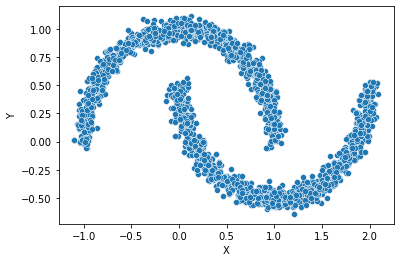

In [ ]:
sns.scatterplot(mydata['X'],mydata['Y'])

We can ask k-means to make as many clusters and it will oblige as opposed to dbscan which finds on its own how many natural clusters are there in the data

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
#ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

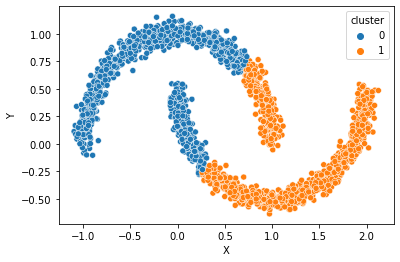

In [ ]:
sns.scatterplot(mydata['X'],mydata['Y'],hue = mydata['cluster'])

As you can see , these are not the clusters that you expected . Lets ask k-mean to make 5 clusters and see what it does

In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_
ggplot(mydata,aes(x='X',y='Y',color='cluster'))+geom_point()

You can force k-means to make as many groups in the data as you want, it wont bother about how many natural groups there are in the data. lets see how dbscan treats this.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
del mydata['cluster']

KeyError: ignored

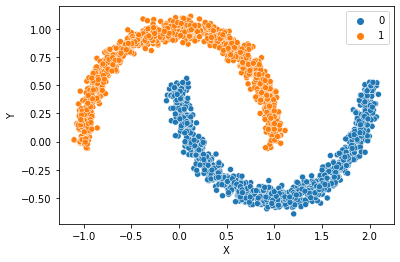

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
db.fit(mydata)
#mydata['cluster'] = db.labels_
sns.scatterplot(mydata['X'],mydata['Y'],hue = db.labels_)

In [ ]:
silhouette_score(mydata,db.labels_) #### silhouette score doesn't give correct interpretations for dbscan clusters.

0.33529664834146455

Lets try increasing eps and see what effects it has . 

In [ ]:
#del mydata['cluster']
db = DBSCAN(eps=0.5, min_samples=10, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_

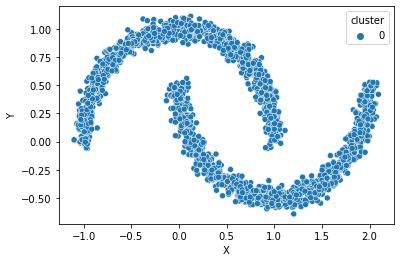

In [ ]:
sns.scatterplot(mydata['X'],mydata['Y'],hue = mydata['cluster'])

As you can see increasing neighborhood size results in all points becoming part of same cluster, which is the intended effect.

Now lets see an example where , dbscan doesnt blindly club all the points into clusters, but leave points which are not supposed to be in any clusters. This also demonstrate how k-means is different from dbscan.

In [ ]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [ ]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['labels']=labels

In [ ]:
ggplot(df,aes(x='x1',y='x2',color='labels'))+geom_point()

You can see how dbscan has found outliers. You can play around with the values of eps and min_samples to see how that changes outlier detection and number of clusters detected by dbscan.
